In [1]:
# imports
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


In [2]:
def get_lower_and_upper_bounds(s, k=1.5):
    '''
    Given a series and a cutoff value, k, returns the lower and upper outliers for the
    series.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper = q3 + k * iqr
    lower = q1 - k * iqr
    print(f'lower bound: {lower}\nupper bound: {upper}')

### 1. Using lemonade.csv dataset and focusing on continuous variables:


In [3]:
lemon = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
lemon = lemon.drop(columns=['Date','Day'])
# lemon.Date = lemon.Date.astype('datetime64[ns]')
lemon

,Temperature,Rainfall,Flyers,Price,Sales
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
3,44.1,1.05,28,0.5,17
4,42.4,1.00,33,0.5,18
...,...,...,...,...,...
360,42.7,1.00,33,0.5,19
361,37.8,1.25,32,0.5,16
362,39.5,1.25,17,0.5,15
363,30.9,1.43,22,0.5,13


In [4]:
lemon.describe(datetime_is_numeric=True).T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


In [5]:
# why is Sales lower smaller than min?
for col in lemon.columns:
    print(col)
    get_lower_and_upper_bounds(lemon[col],1.5)

Temperature
lower bound: 16.700000000000003
upper bound: 104.7
Rainfall
lower bound: 0.26
upper bound: 1.3
Flyers
lower bound: 4.0
upper bound: 76.0
Price
lower bound: 0.5
upper bound: 0.5
Sales
lower bound: 5.0
upper bound: 45.0


- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [6]:
# temp,rain, and sales lowers smaller than their mins
# flyers upper bigger than max
for col in lemon.columns:
    print(col)
    get_lower_and_upper_bounds(lemon[col],3)

Temperature
lower bound: -16.299999999999997
upper bound: 137.7
Rainfall
lower bound: -0.13
upper bound: 1.69
Flyers
lower bound: -23.0
upper bound: 103.0
Price
lower bound: 0.5
upper bound: 0.5
Sales
lower bound: -10.0
upper bound: 60.0


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?


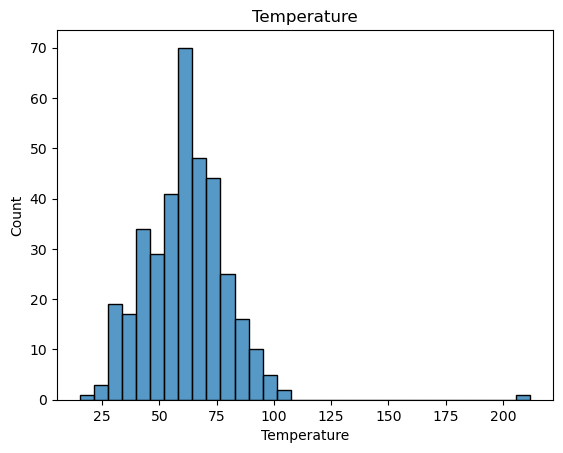

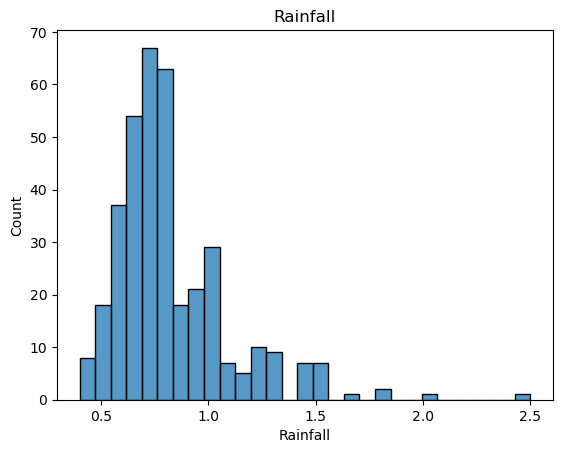

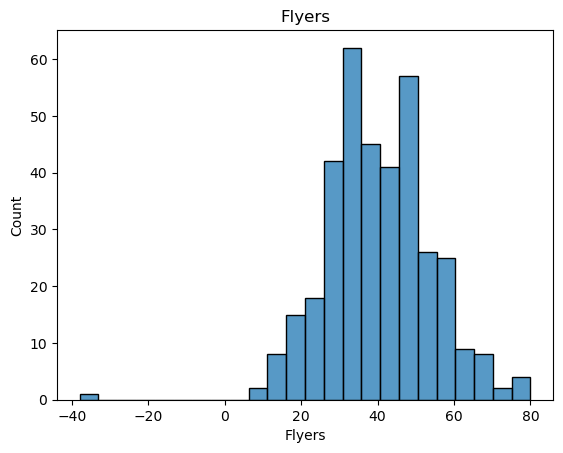

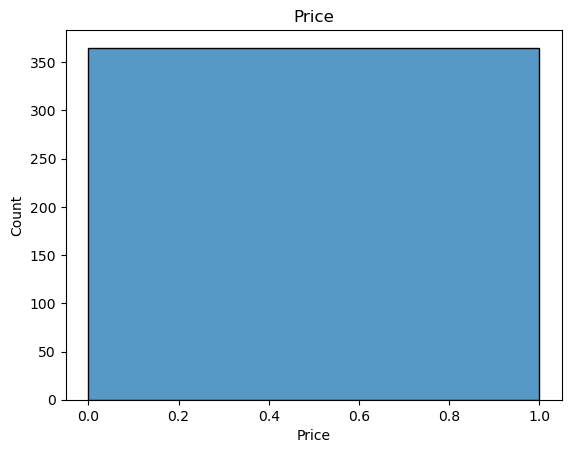

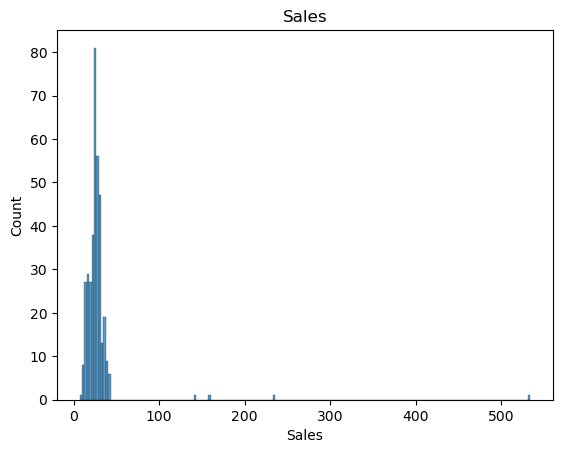

In [7]:
for col in lemon.columns:
    sns.histplot(data=lemon,x=col)
    plt.title(col)
    plt.show()

In [11]:
for col in lemon.columns:
    z = pd.Series((lemon[col] - lemon[col].mean()) / lemon[col].std())
    print(col,(lemon[col][z.abs() >= 2]))

Temperature 41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64
Rainfall 0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64
Flyers 166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64
Price Series([], Name: Price, dtype: float64)
Sales 181    143
182    158
183    235
184    534
Name: Sales, dtype: int64


### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [10]:
for col in lemon.columns:
    z = pd.Series((lemon[col] - lemon[col].mean()) / lemon[col].std())
    print(col,(lemon[col][z.abs() >= 3]))

Temperature 41    212.0
Name: Temperature, dtype: float64
Rainfall 0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64
Flyers 324   -38
Name: Flyers, dtype: int64
Price Series([], Name: Price, dtype: float64)
Sales 181    143
182    158
183    235
184    534
Name: Sales, dtype: int64
